In [1]:
import time
import matplotlib.pyplot as plt
from simple_pid import PID

In [2]:
class WaterBoiler:
    """
    Simple simulation of a water boiler which can heat up water
    and where the heat dissipates slowly over time
    """

    def __init__(self):
        self.water_temp = 20

    def update(self, boiler_power, dt):
        if boiler_power > 0:
            # Boiler can only produce heat, not cold
            self.water_temp += 1 * boiler_power * dt      #### increasing heat temperature equation

        # Some heat dissipation
        self.water_temp -= 0.02 * dt
        return self.water_temp

In [3]:
if __name__ == '__main__':
    boiler = WaterBoiler()
    water_temp = boiler.water_temp

    pid = PID(5, 0.01, 0.1, setpoint=water_temp)
    pid.output_limits = (0, 100)

    start_time = time.time()
    last_time = start_time

    # Keep track of values for plotting
    setpoint, y, x = [], [], []

    while time.time() - start_time < 10:
        current_time = time.time()
        dt = current_time - last_time

        power = pid(water_temp)
        water_temp = boiler.update(power, dt)

        x += [current_time - start_time]
        y += [water_temp]
        setpoint += [pid.setpoint]

        if current_time - start_time > 1:
            pid.setpoint = 100

        last_time = current_time

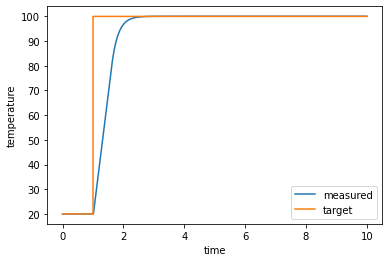

In [4]:
    plt.plot(x, y, label='measured')
    plt.plot(x, setpoint, label='target')
    plt.xlabel('time')
    plt.ylabel('temperature')
    plt.legend()
    plt.show()

In [ ]:
import numpy as np
import matplotlib as plt

In [7]:
class Rectangle:
    def __init__(self, length, breadth, unitcost=0):
        self.length=length
        self.breadth=breadth
        self.unit_cost=unitcost

    def get_perimeter(self):
        return 2*(self.length+self.breadth)

    def get_area(self):
        return self.length*self.breadth


a=Rectangle(160, 120, 2000)
print("Area of Rectangle: %s cm^2" %(a.get_area()))


Area of Rectangle: 19200 cm^2


In [28]:
import time
seconds = time.time()
print("Seconds since epoch =", seconds)

Seconds since epoch = 1655170416.3056161


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from simple_pid import PID

class KalmanFilter(object):
    def __init__(self,dt,u,std_acc,std_meas):
        self.dt = dt
        self.u = u
        self.std_acc = std_acc
        self.A = np.matrix([[1, self.dt],
                            [0, 1]])
        self.B = np.matrix([[(self.dt**2)/2], [self.dt]]) 
        self.H = np.matrix([[1,0]])
        self.Q = np.matrix([[(self.dt**4)/4, (self.dt**3)/2],
                            [(self.dt**3)/2, self.dt**2]]) * self.std_acc**2
        self.R = std_meas**2
        self.P = np.eye(self.A.shape[1])
        self.x = np.matrix([[0],[0]])

